# Zestaw 10. Dyskretna Transformacja Fouriera

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

## 1. FFT

<i>1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera F n i n- elementowego wektora wejściowego (y = F n x). </i>

In [2]:
def F(n):
    ksi = np.exp(-2*np.pi*1j/n)
    return np.array([[ksi**(j*k) for j in range(n)] 
                   for k in range(n)], dtype=complex)

In [72]:
def dft(x):
    n = len(x)
#     assert n & (n-1) == 0
    return F(n)@x

<i>2. Zaimplementuj również IDFT korzystając z podanej tożsamości. </i>

In [4]:
def idft(x):
    n = len(x)
    return np.conjugate(F(n))@x/n

<i>Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej. </i>

In [5]:
x = list(np.random.rand(8))

y = dft(x)
y_numpy = np.fft.fft(x)

print('x: ', x)

print('\ny:\t', y)
print('numpy y:\t', y_numpy)

inv_x = idft(y)
print('\nx:\t', inv_x)
print('numpy x:\t', np.fft.ifft(y_numpy))

print('\ncorrect? ', np.allclose(y, y_numpy) and np.allclose(x, inv_x))

x:  [0.30988135101605707, 0.932089537785881, 0.2106815702640169, 0.9669764733540209, 0.7902062965597373, 0.2605185135531618, 0.8721316220017183, 0.9949325543427887]

y:	 [ 5.33741792+0.00000000e+00j  0.01431541+2.06345561e-01j
  0.01727446+7.69300976e-01j -0.97496531-1.11655454e+00j
 -0.97161624-1.45890471e-15j -0.97496531+1.11655454e+00j
  0.01727446-7.69300976e-01j  0.01431541-2.06345561e-01j]
numpy y:	 [ 5.33741792+0.j          0.01431541+0.20634556j  0.01727446+0.76930098j
 -0.97496531-1.11655454j -0.97161624+0.j         -0.97496531+1.11655454j
  0.01727446-0.76930098j  0.01431541-0.20634556j]

x:	 [0.30988135-1.12410081e-15j 0.93208954-8.70944159e-16j
 0.21068157-5.72934438e-16j 0.96697647-2.57626305e-16j
 0.7902063 -1.03766892e-17j 0.26051851+3.48900081e-16j
 0.87213162+6.26564892e-16j 0.99493255+9.00934533e-16j]
numpy x:	 [0.30988135+0.j 0.93208954+0.j 0.21068157+0.j 0.96697647+0.j
 0.7902063 +0.j 0.26051851+0.j 0.87213162+0.j 0.99493255+0.j]

correct?  True


<i>3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). </i>

In [6]:
def fft(x):
    n = len(x)
    if n == 1:
        return x
    
    part1 = fft(x[::2])
    part2 = fft(x[1::2])
    
    for k in range(n//2):
        p = part1[k]
        q = np.exp(-2*np.pi*1j*k/n)*part2[k]
        part1[k] = p + q
        part2[k] = p - q
        
    return np.concatenate((part1, part2))

In [8]:
print(dft(x))
print(np.fft.fft(x))
print(fft(x))
print(np.allclose(fft(x), np.fft.fft(x)))

[ 5.33741792+0.00000000e+00j  0.01431541+2.06345561e-01j
  0.01727446+7.69300976e-01j -0.97496531-1.11655454e+00j
 -0.97161624-1.45890471e-15j -0.97496531+1.11655454e+00j
  0.01727446-7.69300976e-01j  0.01431541-2.06345561e-01j]
[ 5.33741792+0.j          0.01431541+0.20634556j  0.01727446+0.76930098j
 -0.97496531-1.11655454j -0.97161624+0.j         -0.97496531+1.11655454j
  0.01727446-0.76930098j  0.01431541-0.20634556j]
[ 5.33741792+0.j          0.01431541+0.20634556j  0.01727446+0.76930098j
 -0.97496531-1.11655454j -0.97161624+0.j         -0.97496531+1.11655454j
  0.01727446-0.76930098j  0.01431541-0.20634556j]
True


<i>Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz F dla danych
o różnym rozmiarze. </i>

In [24]:
def compare_fft_times():
    fft_times = []
    dft_times = []
    numpy_times = []
    ns = []
    
    for i in range(1, 10):
        n = 2**i
        ns.append(n)
        x = list(np.random.rand(n))
        start = time()
        
        end = time()
        fft(x)
        fft_times.append(end-start)
        
        start = time()
        dft(x)
        end = time()
        dft_times.append(end-start)
        
        start = time()
        np.fft.fft(x)
        end = time()
        numpy_times.append(end-start)
    
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_facecolor('#FFF2EB')
    ax.plot(ns, fft_times, label='fft', color='#e5989b', lw=5)
    ax.plot(ns, dft_times, label='dft', color='#6d6875', lw=5)
    ax.plot(ns, numpy_times, label='numpy fft', color='#b5838d', lw=5)
    ax.legend()

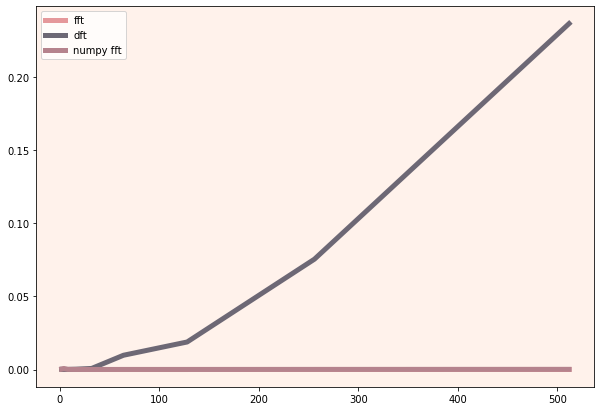

In [25]:
compare_fft_times()

Wyniki: //TODO

## 2. DFT w 1D 

* Wygeneruj dwa sygnały czasowo-amplitudowe:

a) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

In [57]:
def signal_a(a=0, b=10):
    x = np.linspace(a, b, 10000)
    signals = [np.sin(x), np.sin(2*x), np.sin(3*x), np.sin(4*x), np.sin(5*x)]
    
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    for signal in signals:
        ax[0].plot(x, signal)
    
    sum_signal = np.sum(signals, axis=0)
    ax[1].plot(x, sum_signal)
    return x, sum_signal

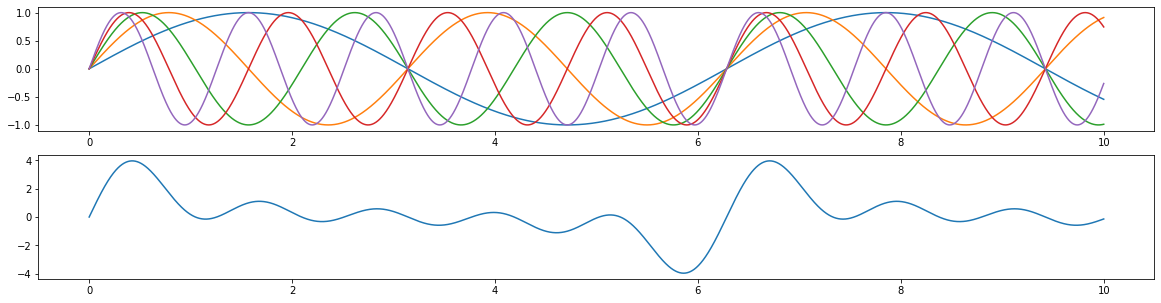

In [58]:
x, signal_a = signal_a()

b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

In [59]:
def signal_b(a=0, b=20):
    x = np.linspace(a, b, 10000)
    interval = len(x)//5
    
    signals = np.array([ np.sin(x[:interval]),  
               np.sin(2*x[interval:2*interval]),
               np.sin(3*x[2*interval:3*interval]),
               np.sin(4*x[3*interval:4*interval]),
               np.sin(5*x[4*interval:5*interval])])

    
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    for i, signal in enumerate(signals):
        ax[0].plot(x[i*interval:(i+1)*interval], signal)
        
    signal = signals.flatten()
    ax[1].plot(x, signal)
        
    return x, signal

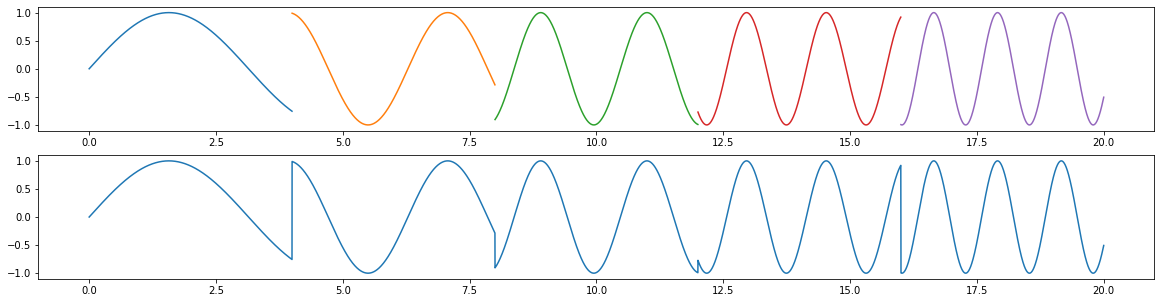

In [60]:
x, signal_b = signal_b()

* Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj
otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część
urojoną wyniku transformacji.

In [70]:
def transform(x, signal):
    transformed_signal = dft(np.array(signal, dtype=complex))
    
    fig, ax = plt.subplots(3, 1, figsize=(20, 20))
    ax[0].plot(x, signal)
    ax[1].plot(x, np.real(transformed_signal))
    ax[2].plot(x, np.imag(transformed_signal))
    plt.show()
    return transformed_signal

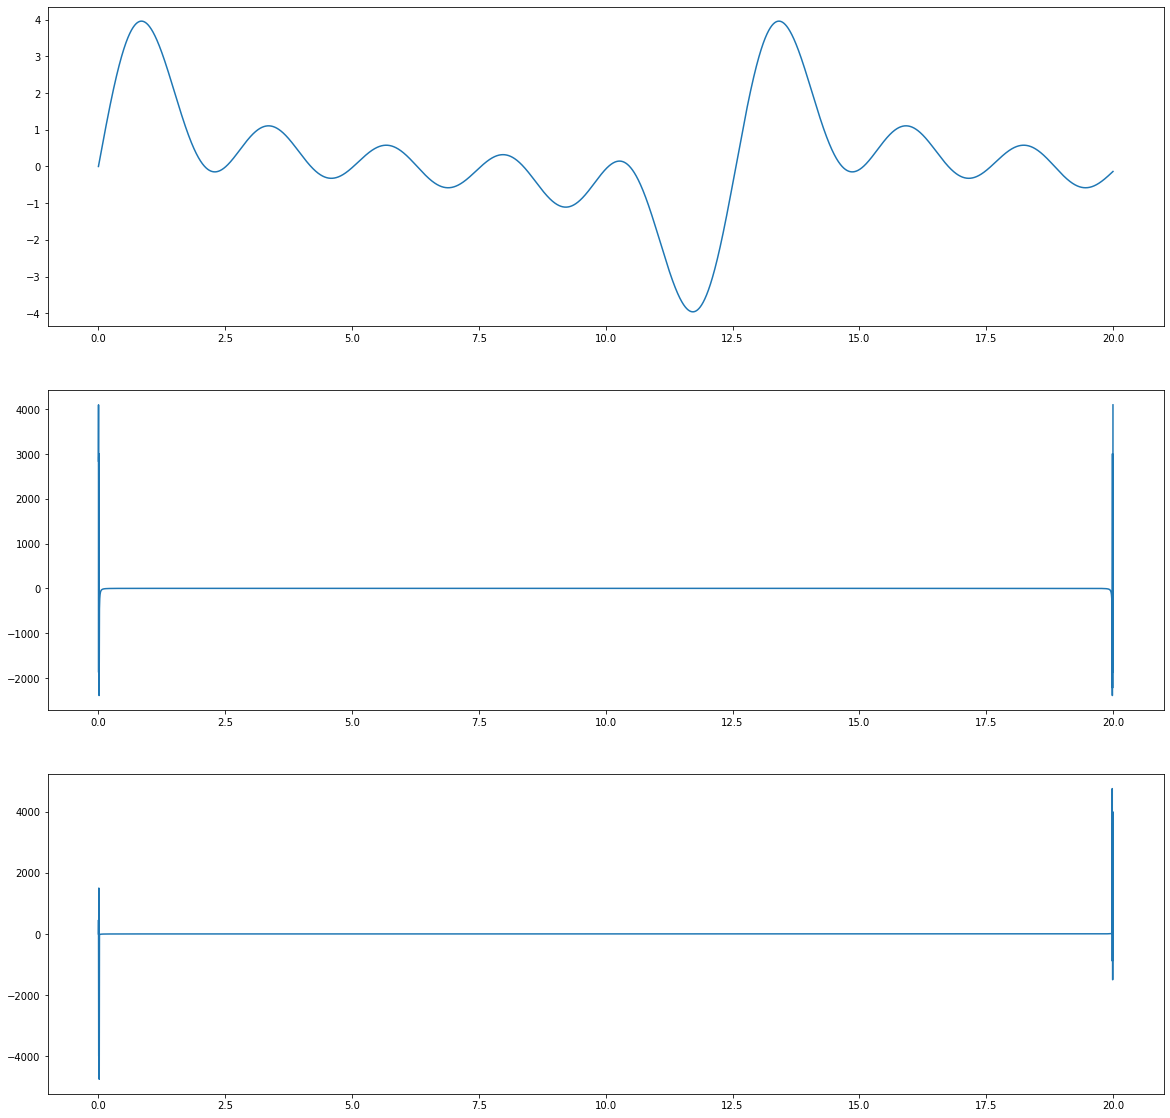

array([ 2840.33470417   +0.j        ,  4095.14435818 +455.03810543j,
       -1874.53925399-1540.50817456j, ...,  2940.74695424+3997.28835468j,
       -1874.53924488+1540.50817418j,  4095.1443545  -455.03810088j])

In [73]:
transform(x,  signal_a)

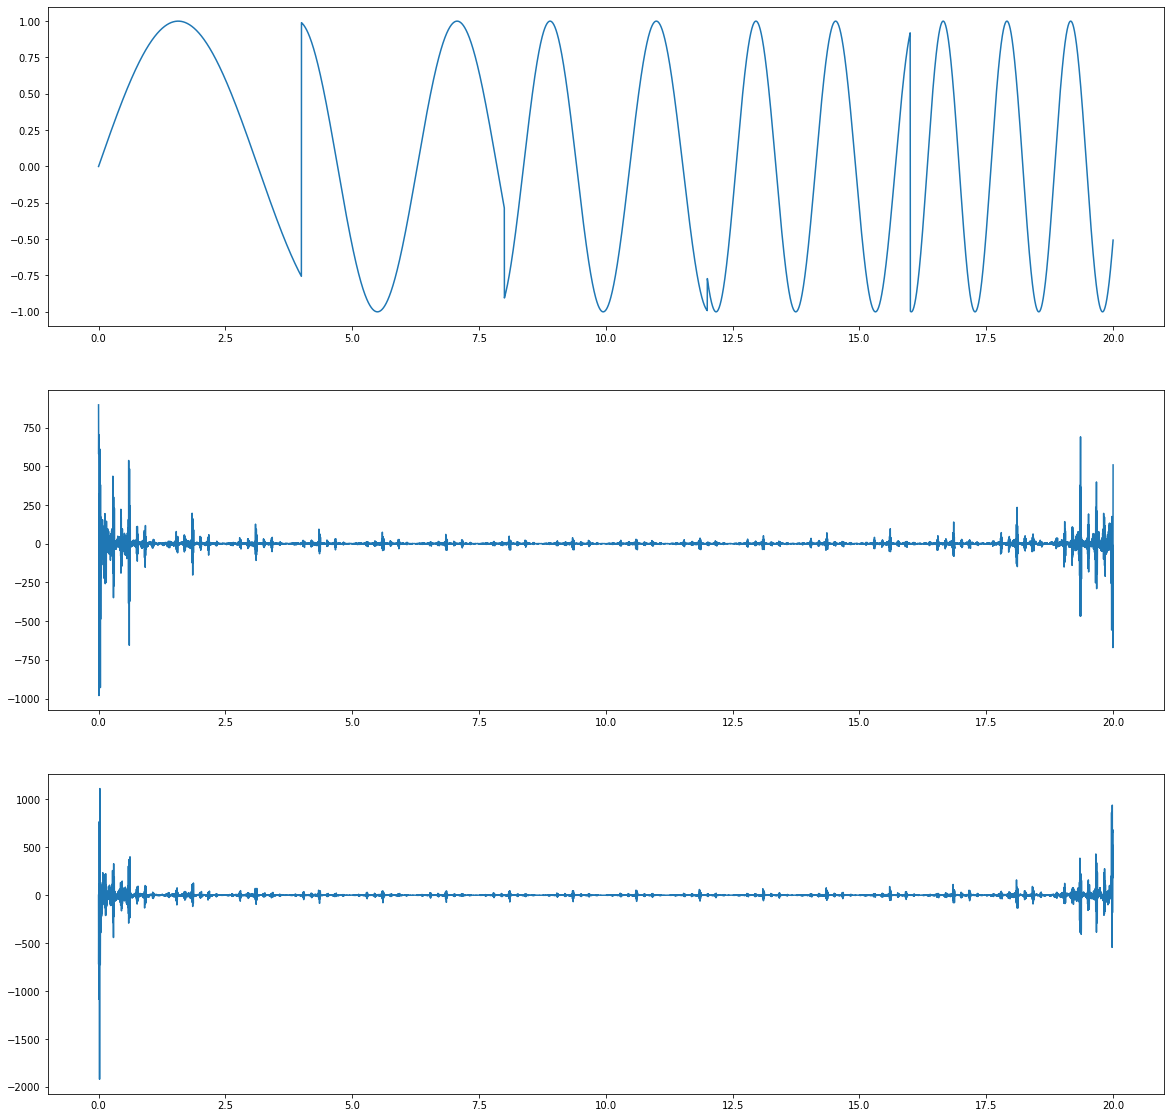

array([ 896.28644468  +0.j        ,  578.74051111-721.25396866j,
        704.14077378-420.18533206j, ..., -671.05344639+433.43736195j,
        -18.64497556+681.22769479j,  508.55266964+662.24327393j])

In [69]:
transform(x,  signal_b)

wykresy i interpretacja, dlaczego to się tak zachowuje

## Wnioski

- 
- 

M. Hawryluk 07.06.2021